### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : nem_price.csv 
Name        : Yudi Aditya

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Cash Price

#### 1. Reading Data

In [3]:
# Read Bitcoin Cash Price
df1 = pd.read_csv('../data/raw/cryptocurrencypricehistory/nem_price.csv', parse_dates = ['Date'])
df1.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,0.276383,0.292048,0.250638,0.286227,"7,635,410","2,487,450,000"
1,2017-09-04,0.307735,0.310661,0.256488,0.273220,"9,299,200","2,769,620,000"
2,2017-09-03,0.298170,0.320628,0.285382,0.307264,"7,413,990","2,683,530,000"
3,2017-09-02,0.331627,0.332056,0.283507,0.295884,"9,560,410","2,984,640,000"
4,2017-09-01,0.336602,0.337780,0.312575,0.332310,"12,082,700","3,029,420,000"


In [4]:
type(df1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
# Set Date as it's index
df1.set_index('Date', inplace = True )

In [6]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2017-09-05 to 2015-04-01
Data columns (total 6 columns):
Open          889 non-null float64
High          889 non-null float64
Low           889 non-null float64
Close         889 non-null float64
Volume        889 non-null object
Market Cap    889 non-null object
dtypes: float64(4), object(2)
memory usage: 48.6+ KB


- The data frame has 889 entries and 6 columns. 
- All columns has 889 elements, probably there's no missing data. To make it sure, We'll see for this
- Volume and market cap's data type are an object, it should be number.

In [7]:
# Replace missing data as NaN
df1.replace('-', np.nan,inplace=True)
# Count missing data
df1.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

#### 2. Cleaning Data Part (Deal with Wrong Format)

Problem :
- Some data has different format, therefore Volume recognize as a string, not a number.

Solution:
- Convert to float number

In [8]:
print('Volume Data Type :', type(df1.Volume[0]))
print('Market Cap Data Type :', type(df1['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [9]:
#convert data to number
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df1.Volume = df1.Volume.apply(convert_to_number)
df1['Market Cap'] = df1['Market Cap'].apply(convert_to_number)

df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2017-09-05 to 2015-04-01
Data columns (total 6 columns):
Open          889 non-null float64
High          889 non-null float64
Low           889 non-null float64
Close         889 non-null float64
Volume        889 non-null int64
Market Cap    889 non-null int64
dtypes: float64(4), int64(2)
memory usage: 88.6 KB


In [10]:
df1.describe()

,Open,High,Low,Close,Volume,Market Cap
count,889.000000,889.000000,889.000000,889.000000,8.890000e+02,8.890000e+02
mean,0.030924,0.033154,0.028905,0.031218,1.933999e+06,2.783157e+08
std,0.071076,0.075895,0.066420,0.071526,5.746952e+06,6.396820e+08
min,0.000086,0.000089,0.000079,0.000086,6.900000e+01,7.713480e+05
25%,0.000164,0.000176,0.000155,0.000164,4.765000e+03,1.473700e+06
50%,0.002697,0.003041,0.002509,0.003041,5.518900e+04,2.427420e+07
75%,0.006950,0.007199,0.006559,0.006938,4.709940e+05,6.254640e+07
max,0.336602,0.349178,0.312575,0.337213,7.375270e+07,3.029420e+09


#### 3. Cleaning Data 2 (Deal with Missing Data)

In [11]:
df1.isna().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

There is no missing Data

#### 4. Data Visualization

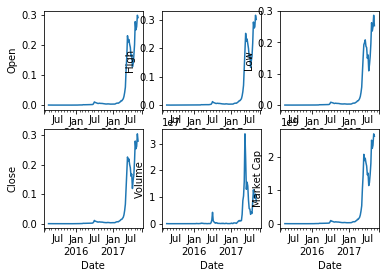

In [12]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df1.Open.resample('W').mean().plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df1.High.resample('W').mean().plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df1.Low.resample('W').mean().plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df1.Close.resample('W').mean().plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df1['Volume'].resample('W').mean().plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap')
df1['Market Cap'].resample('W').mean().plot()